In [167]:
import pandas as pd  
import matplotlib.pyplot as plt 
import numpy as np

Reading Water Level At Galchi and Chumlingtar

In [168]:
wl_galchi_dec10_dec12=pd.read_csv('Dataset/Galchi_2024-12-10 to 2024-12-12.csv')
wl_buddhi_dec10_dec12=pd.read_csv('Dataset/BudhiGandaki_2024-12-10 to 2024-12-12.csv')
wl_siurenitar_dec_10_dec12=pd.read_csv('Dataset/Siurenitar_2024-12-10 to 2024-12-12.csv')


Handling Null Values in Original Dataset Via Interpolation

In [169]:
def handle_null_values(df):
    #for the first null value with no preceeding value.
    df['value']=df['value'].fillna(method='bfill')
    #since water levels are continuous and expected to follow a natural trend we interpolate null values
    df['value']=df['value'].interpolate(method='linear') 

Handle Obvious Outliers

In [170]:
def handle_outliers(df):
    min_value=50
    max_value=10000000
    # Remove rows where the specific column's value is below the minimum or above the maximum threshold
    df = df[(df['value'] >= min_value) & (df['value'] <= max_value)].copy() 
    # print(df.head())
    
    return df

Converting to relevant data types:

In [171]:
def preprocess_data(df):   
    df['dateTime']=pd.to_datetime(df['dateTime'])
    df['value']=pd.to_numeric(df['value'],errors='coerce')
    df.set_index('dateTime',inplace=True)
    df=handle_outliers(df)
    handle_null_values(df)
    return df


Preprocess Data

In [172]:
#Only the original df should be preprocessed,else there will be error
wl_galchi_dec10_dec12=preprocess_data(wl_galchi_dec10_dec12)
wl_buddhi_dec10_dec12=preprocess_data(wl_buddhi_dec10_dec12)
wl_siurenitar_dec_10_dec12=preprocess_data(wl_siurenitar_dec_10_dec12)

C:\Users\aryan\AppData\Local\Temp\ipykernel_2284\2824129155.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['value']=df['value'].fillna(method='bfill')
C:\Users\aryan\AppData\Local\Temp\ipykernel_2284\2824129155.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['value']=df['value'].fillna(method='bfill')
C:\Users\aryan\AppData\Local\Temp\ipykernel_2284\2824129155.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['value']=df['value'].fillna(method='bfill')


Verifying Preprocess Data

In [173]:
print(wl_galchi_dec10_dec12.dtypes)
print(wl_galchi_dec10_dec12)
print(wl_galchi_dec10_dec12.isnull().sum())

value    float64
dtype: object
                          value
dateTime                       
2024-12-10 00:05:00  366.192383
2024-12-10 00:15:00  366.191498
2024-12-10 00:25:00  366.197784
2024-12-10 00:35:00  366.198090
2024-12-10 00:45:00  366.200989
...                         ...
2024-12-12 23:15:00  366.180298
2024-12-12 23:25:00  366.182678
2024-12-12 23:35:00  366.180695
2024-12-12 23:45:00  366.178894
2024-12-12 23:55:00  366.181793

[432 rows x 1 columns]
value    0
dtype: int64


Get Plot Bounds

In [174]:
def get_plot_bounds(input_data):
    # Calculate the min and max values 
    min_value = input_data.min()
    max_value = input_data.max()

    # Adding a small margin to the min and max values to make sure the plot is not clipped
    margin = 0.05  # 5% margin
    min_margin = min_value - margin * (max_value - min_value)
    max_margin = max_value + margin * (max_value - min_value)
    return min_margin,max_margin
    

In [175]:
def get_plot_bounds_x():
    # Determine common x-axis limits and ticks
    x_min = min(wl_galchi_dec10_dec12.index.min(), wl_buddhi_dec10_dec12.index.min(), wl_siurenitar_dec_10_dec12.index.min())
    x_max = max(wl_galchi_dec10_dec12.index.max(), wl_buddhi_dec10_dec12.index.max(), wl_siurenitar_dec_10_dec12.index.max())
    common_xticks = pd.date_range(start=x_min, end=x_max, freq='4H')  # Hourly ticks
    return x_min,x_max,common_xticks

Plot Water Level Data

C:\Users\aryan\AppData\Local\Temp\ipykernel_2284\1402248724.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  common_xticks = pd.date_range(start=x_min, end=x_max, freq='4H')  # Hourly ticks


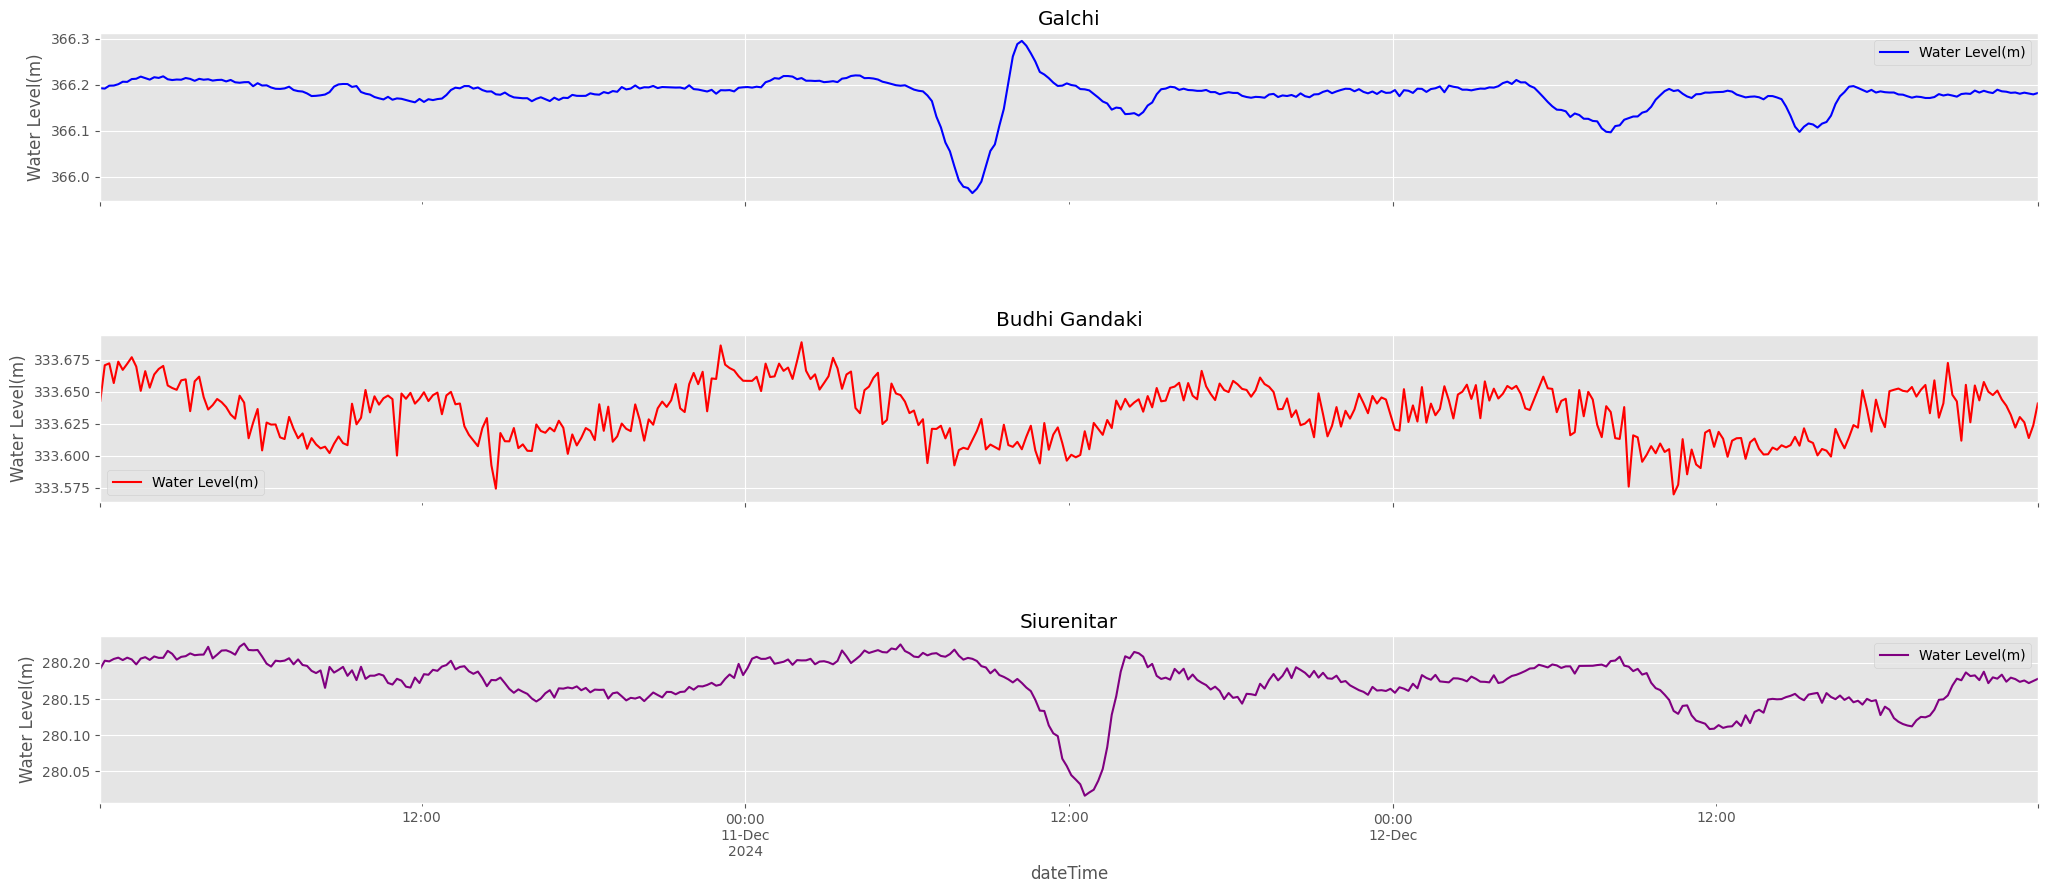

In [176]:
plt.style.use('ggplot')
fig,ax=plt.subplots(3,1,figsize=(25,10),sharex=True)
# min_margin,max_margin=get_plot_bounds(wl_galchi_dec10_dec12['value'])
x_min,x_max,common_xticks=get_plot_bounds_x()

wl_galchi_dec10_dec12.plot(ax=ax[0],color='blue')
ax[0].set_ylabel('Water Level(m)')
ax[0].legend(['Water Level(m)'])
ax[0].set_title('Galchi')

# # Remove preexisting x-ticks and labels
# ax[0].tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax[0].set_xlim(x_min, x_max)
ax[0].set_xticks(common_xticks)
ax[0].set_xticklabels(common_xticks.strftime('%m-%d %H:%M'), rotation=0)



wl_buddhi_dec10_dec12.plot(ax=ax[1],color='red')
ax[1].set_ylabel('Water Level(m)')
ax[1].legend(['Water Level(m)'])
ax[1].set_title('Budhi Gandaki')

wl_siurenitar_dec_10_dec12.plot(ax=ax[2],color='purple')
ax[2].set_ylabel('Water Level(m)')
ax[2].legend(['Water Level(m)'])
ax[2].set_title('Siurenitar')
# ax.set_ylim(min_margin,max_margin)
fig.subplots_adjust(hspace=0.8) 
plt.show()


In [177]:
def calcualte_discharge_galchi(water_level):
    a=174.033420951409
    b=1.23635884471447
    c=365.6
    discharge=a*(water_level-c)**b
    return discharge

In [178]:
def calcualte_discharge_chumlingtar(water_level):
    a=417.1536
    b=0.36303508
    c=333.56
    discharge=a*(water_level-c)**b
    return discharge

In [179]:
wl_galchi_dec10_dec12['discharge']=calcualte_discharge_galchi(wl_galchi_dec10_dec12['value'])
wl_buddhi_dec10_dec12['discharge']=calcualte_discharge_chumlingtar(wl_buddhi_dec10_dec12['value'])
wl_buddhi_dec10_dec12.head()

,value,discharge
dateTime,,
2024-12-10 00:05:00,333.642914,168.934998
2024-12-10 00:15:00,333.670715,187.633287
2024-12-10 00:25:00,333.672211,188.549377
2024-12-10 00:35:00,333.656799,178.703090
2024-12-10 00:45:00,333.673523,189.346908


In [180]:
def calcualte_mean_velocity_galchi(discharge):
    return 0.002*discharge+1.142

In [181]:
def calcualte_mean_velocity_buddhi(discharge):
    return (0.002851381701*discharge)+0.646

In [200]:
wl_galchi_dec10_dec12['mean_velocity']= calcualte_mean_velocity_galchi(wl_galchi_dec10_dec12['discharge'])
wl_buddhi_dec10_dec12['mean_velocity']= calcualte_mean_velocity_buddhi(wl_buddhi_dec10_dec12['discharge'])
wl_galchi_dec10_dec12.head()

,value,discharge,mean_velocity,time_lag_hr
dateTime,,,,
2024-12-10 00:05:00,366.192383,91.093562,1.324187,6
2024-12-10 00:15:00,366.191498,90.925333,1.323851,6
2024-12-10 00:25:00,366.197784,92.121625,1.326243,6
2024-12-10 00:35:00,366.198090,92.179774,1.326360,6
2024-12-10 00:45:00,366.200989,92.732533,1.327465,6


In [187]:
def calcualte_time_lag_min(distance,velocity):
    time_lag = round(distance / (velocity * 3600))
    if np.isnan(velocity) or velocity == 0:
        return np.nan  # Return NaN if velocity is invalid
    return time_lag

In [196]:
distance_galchi_siurenitar=30000
distance_buddhi_siurenitar=18500
wl_galchi_dec10_dec12['time_lag_hr']=  wl_galchi_dec10_dec12['mean_velocity'].apply(lambda vel: calcualte_time_lag_min(distance_galchi_siurenitar, vel))
wl_buddhi_dec10_dec12['time_lag_hr']= wl_buddhi_dec10_dec12['mean_velocity'].apply(lambda vel: calcualte_time_lag_min(distance_buddhi_siurenitar, vel))


Function to Create shifted Df

In [211]:
def create_shifted_df(df):
    shifted_data = [
    {'dateTime': index + pd.DateOffset(hours=lag), 'discharge': discharge}
    for index, lag, discharge in zip(df.index, df['time_lag_hr'], df['discharge'])
]
    return pd.DataFrame(shifted_data)

Creating Shifted Dataframes

In [ ]:
shifted_galchi=create_shifted_df(wl_galchi_dec10_dec12)
shifted_buddhi=create_shifted_df(wl_buddhi_dec10_dec12)
print(shifted_galchi.head())
print('--------')
print(shifted_buddhi.head())

Joining The time shifted tables and summing discharge

In [ ]:
merged_df = pd.merge(shifted_galchi, shifted_buddhi, on='dateTime', how='outer', suffixes=('_galchi', '_buddhi'))

# Fill NaN with 0 and add the columns
merged_df['discharge'] = merged_df['discharge_galchi'].fillna(0) + merged_df['discharge_buddhi'].fillna(0)

# Set 'discharge' to NaN if both columns are NaN
for index, row in merged_df.iterrows():
    if pd.isna(row['discharge_galchi']) and pd.isna(row['discharge_buddhi']):
        merged_df.at[index, 'discharge'] = np.nan
        

Checking if summation is correclty functioning:

In [219]:
#merged_df_filtered = merged_df[merged_df['discharge_galchi'].notna() & merged_df['discharge_buddhi'].notna()]
# merged_df_filtered

Creating the Computed Siurenitar Df

In [222]:
computed_siurenitar_df = merged_df[['dateTime', 'discharge']]
computed_siurenitar_df.head()

,dateTime,discharge
0,2024-12-10 04:15:00,187.633287
1,2024-12-10 04:25:00,188.549377
2,2024-12-10 04:35:00,178.703090
3,2024-12-10 04:45:00,189.346908
4,2024-12-10 04:55:00,185.394364


Visualizing The Computed Siurenitar Df